## Data Mining Lab <br/>
### ASG3<br/>
#### Name: Samarth Garg
#### Roll No: 2020IMT-085<br/>

In [27]:
# Que i). Normalize all columns to lie between -1 and 1 using mu-sigma normalisation.

import pandas as pd

data_frame = pd.read_csv('data/85.csv')
id_column = data_frame.iloc[:, 0]
data_for_normalization = data_frame.iloc[:, 1:]

scaled_data = (data_for_normalization - data_for_normalization.mean()) / data_for_normalization.std()
scaled_data = 2 * ((scaled_data - scaled_data.min()) / (scaled_data.max() - scaled_data.min())) - 1

scaled_data.insert(0, 'ID', id_column)
scaled_data.to_csv('normalized_data.csv', index=False)


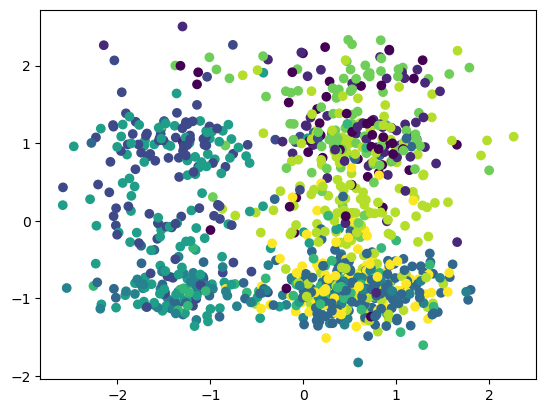

In [30]:
# Que ii). Perform k-means clustering using 10 clusters


import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = pd.read_csv('normalized_data.csv')

features = data.iloc[:, 1:].values

standardizer = StandardScaler()
features_standardized = standardizer.fit_transform(features)

kmeans_model = KMeans(n_clusters=10, random_state=0)
assigned_clusters = kmeans_model.fit_predict(features_standardized)

data['Assigned_Cluster'] = assigned_clusters

plt.scatter(features_standardized[:, 0], features_standardized[:, 1], c=assigned_clusters, cmap='viridis')
plt.show()

c:\Users\Samarth\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


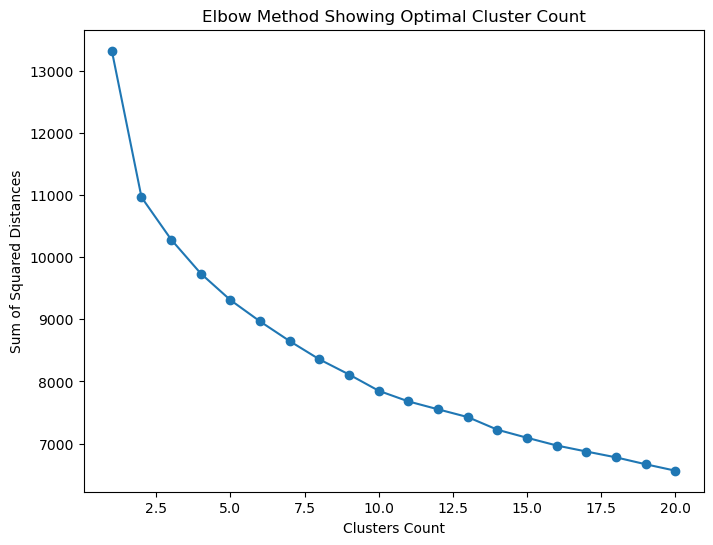

In [31]:
# Que iii). Draw a plot of the intra-class distance from the cluster center v/s the number of clusters.
# Using the same plot suggest the ideal number of clusters using knee analysis.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_frame = pd.read_csv('normalized_data.csv')
data_points = data_frame.iloc[:, 1:].values

normalizer = StandardScaler()
normalized_data = normalizer.fit_transform(data_points)

cluster_inertia = []
cluster_range = range(1, 21)

for cluster_count in cluster_range:
    cluster_model = KMeans(n_clusters=cluster_count, random_state=0)
    cluster_model.fit(normalized_data)
    cluster_inertia.append(cluster_model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, cluster_inertia, marker='o')
plt.xlabel('Clusters Count')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method Showing Optimal Cluster Count')
plt.show()

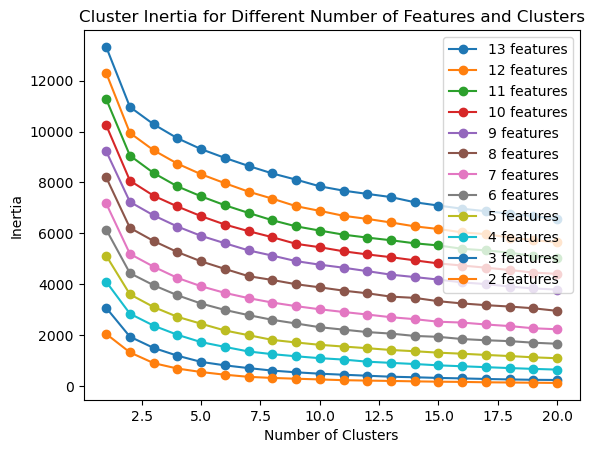

In [6]:
# Que 4.) Iteratively drop the features with the lowest variation till there is only 1 feature. Repeat (iii) for different number of features.

import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')

dataset = pd.read_csv('normalized_data.csv')
features = dataset.iloc[:, 1:].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia_results = {}
for feature_count in range(features.shape[1], 1, -1):
    selected_features = scaled_features[:, scaled_features.var(axis=0).argsort()[::-1][:feature_count]]
    
    cluster_inertia = []
    for cluster_num in range(1, 21):
        cluster_model = KMeans(n_clusters=cluster_num, random_state=0)
        cluster_model.fit(selected_features)
        cluster_inertia.append(cluster_model.inertia_)
    inertia_results[feature_count] = cluster_inertia

for feature_count, inertia in inertia_results.items():
    plt.plot(range(1, 21), inertia, marker='o', label=f'{feature_count} features')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Cluster Inertia for Different Number of Features and Clusters')
plt.legend()
plt.show()



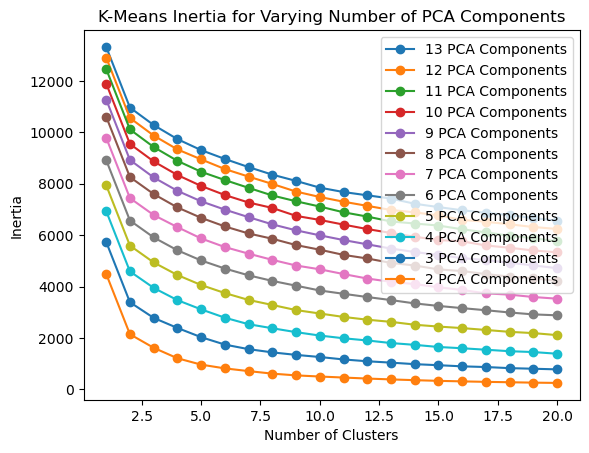

In [7]:
# Que v). Using PCA reduce the number of features. Repeat (iii) for different number of features.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_frame = pd.read_csv('normalized_data.csv')
data_values = data_frame.iloc[:, 1:].values

data_scaler = StandardScaler()
scaled_data = data_scaler.fit_transform(data_values)

inertia_dict = {}

for components in reversed(range(2, data_values.shape[1] + 1)):
    pca_model = PCA(n_components=components)
    transformed_data = pca_model.fit_transform(scaled_data)

    kmeans_inertia = []
    for cluster_count in range(1, 21):
        kmeans_model = KMeans(n_clusters=cluster_count, random_state=0)
        kmeans_model.fit(transformed_data)
        kmeans_inertia.append(kmeans_model.inertia_)

    inertia_dict[components] = kmeans_inertia

for components, inertia_values in inertia_dict.items():
    plt.plot(range(1, 21), inertia_values, marker='o', label=f'{components} PCA Components')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-Means Inertia for Varying Number of PCA Components')
plt.legend()
plt.show()


c:\Users\Samarth\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


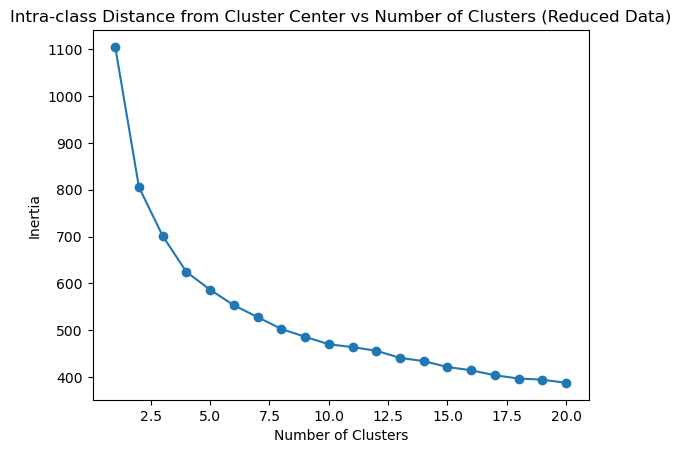

In [ ]:
# Que vii). Using (iii) identify the clusters with a very small membership (very few elements in the cluster).
# Delete all data of that cluster, and repeat the solution of (iii) with the reduced data.

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

normalized_df = pd.read_csv('normalized_data.csv')

X = normalized_df.iloc[:, 1:].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(X_scaled)

normalized_df['Cluster'] = clusters

cluster_counts = normalized_df['Cluster'].value_counts()

threshold = 5

small_clusters = cluster_counts[cluster_counts < threshold].index

reduced_df = normalized_df[~normalized_df['Cluster'].isin(small_clusters)]

X_reduced = reduced_df.iloc[:, 1:-1].values

inertia_reduced = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_reduced)
    inertia_reduced.append(kmeans.inertia_)

plt.plot(range(1, 21), inertia_reduced, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Intra-class Distance from Cluster Center vs Number of Clusters (Reduced Data)')
plt.show()


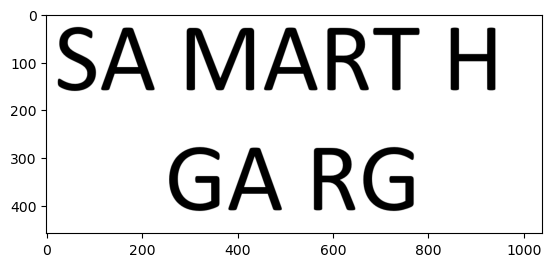

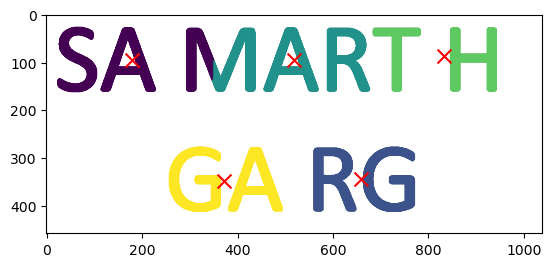

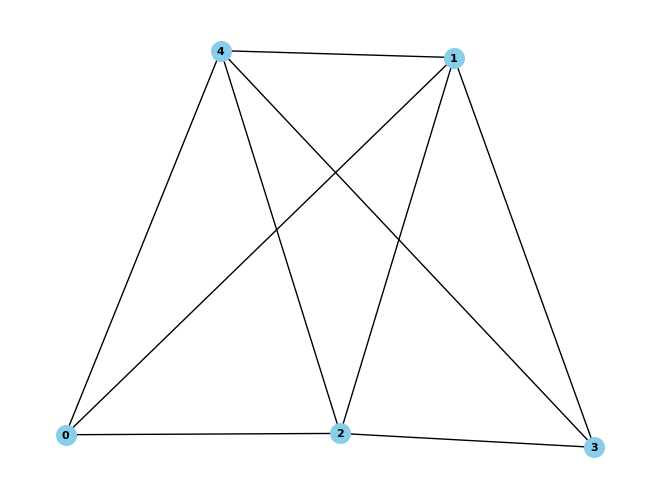

In [ ]:
# Que viii). Using any image editor, write your full name using black ink with a white background and save it as an image.
# Cluster all black points using k-means clustering and plot the cluster centers. Connect every cluster head to the c-closest
# cluster heads by an undirected edge. Plot the graph hence produced for different values of k and c.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
import networkx as nx
from scipy.ndimage import zoom

image = plt.imread('name.png')
plt.imshow(image)
plt.show()

if image.shape[2] == 4: 
    image = image[:, :, :3]

scale_factor = 0.5 
new_shape = (int(image.shape[0] * scale_factor), int(image.shape[1] * scale_factor), image.shape[2])
resized_image = zoom(image, (scale_factor, scale_factor, 1), order=1)

if image is None or len(image.shape) != 3 or image.shape[2] != 3:
    raise ValueError("Image not loaded correctly or not in expected RGB format")

black_pixels = np.argwhere(np.all(image == [0, 0, 0], axis=-1))

kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit_predict(black_pixels)

cluster_centers = kmeans.cluster_centers_

plt.imshow(image)
plt.scatter(black_pixels[:, 1], black_pixels[:, 0], c=clusters, cmap='viridis', s=1)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0], c='red', marker='x', s=100)
plt.show()

G = nx.Graph()
G.add_nodes_from(range(len(cluster_centers)))

for i, center in enumerate(cluster_centers):
    distances = distance.cdist([center], cluster_centers, 'euclidean')[0]
    closest_indices = np.argsort(distances)[1:4]
    for idx in closest_indices:
        G.add_edge(i, idx)

pos = {i: (cluster_centers[i, 1], cluster_centers[i, 0]) for i in range(len(cluster_centers))}
nx.draw(G, pos, with_labels=True, node_size=200, node_color='skyblue', font_size=8, font_color='black', font_weight='bold')
plt.show()